In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [ ]:
lead=pd.read_csv('/content/Leads_TimeSeries_Oye!.csv',date_parser=dateparse)

In [ ]:
lead.drop('lead_source',axis=1,inplace=True)

**PROPHET MODEL**

In [ ]:
import fbprophet

In [ ]:
from fbprophet import Prophet


In [ ]:
lead.head(20)

,date,count
0,2020-06-01,1
1,2020-06-01,16
2,2020-06-01,29
3,2020-06-01,12
4,2020-06-02,26
5,2020-06-02,3
6,2020-06-02,1
7,2020-06-02,16
8,2020-06-02,10
9,2020-06-02,1


In [ ]:
lead=lead[(lead['date']>='2020-06-01') & (lead['date']<='2021-04-15')]

In [ ]:
lead.head()

,date,count
0,2020-06-01,1
1,2020-06-01,16
2,2020-06-01,29
3,2020-06-01,12
4,2020-06-02,26


In [ ]:
data=lead.groupby('date').sum()['count'].reset_index()


In [ ]:
data

,date,count
0,2020-06-01,58
1,2020-06-02,57
2,2020-06-03,66
3,2020-06-04,69
4,2020-06-05,67
...,...,...
314,2021-04-11,13
315,2021-04-12,32
316,2021-04-13,37
317,2021-04-14,37


In [ ]:
data.columns=['ds','y']


In [ ]:
model=Prophet(interval_width=0.95)


In [ ]:
model.fit(data)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=100)


In [ ]:
future

,ds
0,2020-06-01
1,2020-06-02
2,2020-06-03
3,2020-06-04
4,2020-06-05
...,...
414,2021-07-20
415,2021-07-21
416,2021-07-22
417,2021-07-23


In [ ]:
pred=model.predict(future)


In [ ]:
pred


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-01,96.195050,12.917943,186.260994,96.195050,96.195050,4.614485,4.614485,4.614485,4.614485,4.614485,4.614485,0.0,0.0,0.0,100.809535
1,2020-06-02,96.338102,8.371707,182.350307,96.338102,96.338102,-2.433535,-2.433535,-2.433535,-2.433535,-2.433535,-2.433535,0.0,0.0,0.0,93.904566
2,2020-06-03,96.481153,9.778508,179.878495,96.481153,96.481153,-3.760416,-3.760416,-3.760416,-3.760416,-3.760416,-3.760416,0.0,0.0,0.0,92.720738
3,2020-06-04,96.624204,17.914600,191.208429,96.624204,96.624204,5.220774,5.220774,5.220774,5.220774,5.220774,5.220774,0.0,0.0,0.0,101.844978
4,2020-06-05,96.767256,16.532262,202.079068,96.767256,96.767256,13.700743,13.700743,13.700743,13.700743,13.700743,13.700743,0.0,0.0,0.0,110.467998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2021-07-20,62.456621,-30.164248,153.114018,44.927429,79.252883,-2.433535,-2.433535,-2.433535,-2.433535,-2.433535,-2.433535,0.0,0.0,0.0,60.023085
415,2021-07-21,62.466500,-36.927386,147.008585,44.606365,79.691849,-3.760416,-3.760416,-3.760416,-3.760416,-3.760416,-3.760416,0.0,0.0,0.0,58.706084
416,2021-07-22,62.476379,-18.334286,155.496061,44.207035,80.130816,5.220774,5.220774,5.220774,5.220774,5.220774,5.220774,0.0,0.0,0.0,67.697152
417,2021-07-23,62.486257,-13.900418,160.431978,43.945670,80.569782,13.700743,13.700743,13.700743,13.700743,13.700743,13.700743,0.0,0.0,0.0,76.187000


In [ ]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
414,2021-07-20,60.023085,-30.164248,153.114018
415,2021-07-21,58.706084,-36.927386,147.008585
416,2021-07-22,67.697152,-18.334286,155.496061
417,2021-07-23,76.187000,-13.900418,160.431978
418,2021-07-24,60.881863,-24.894934,150.188467


In [ ]:
pred[['ds','yhat','yhat_lower','yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2020-06-01,100.809535,12.917943,186.260994
1,2020-06-02,93.904566,8.371707,182.350307
2,2020-06-03,92.720738,9.778508,179.878495
3,2020-06-04,101.844978,17.914600,191.208429
4,2020-06-05,110.467998,16.532262,202.079068


In [ ]:
data.index=data['ds']

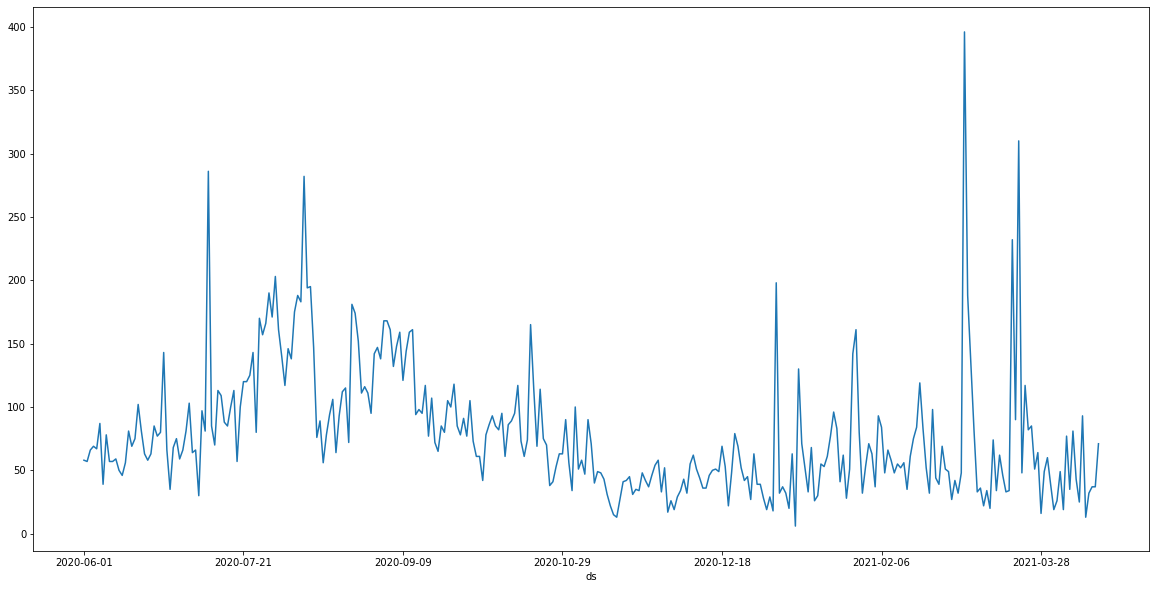

In [ ]:
data['y'].plot(figsize=(20,10))


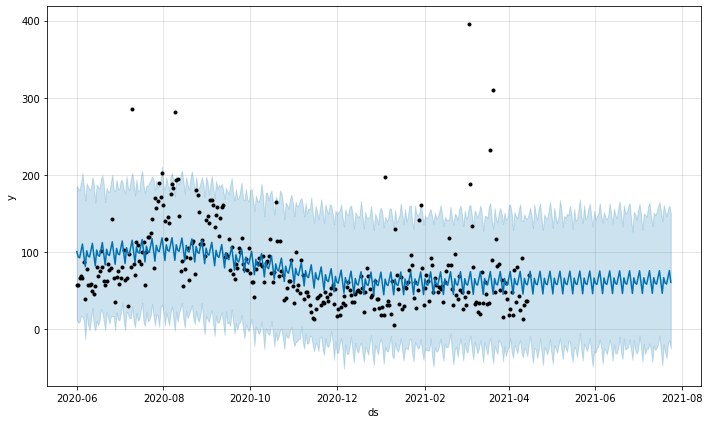

In [ ]:
data_forecast=model.plot(pred)


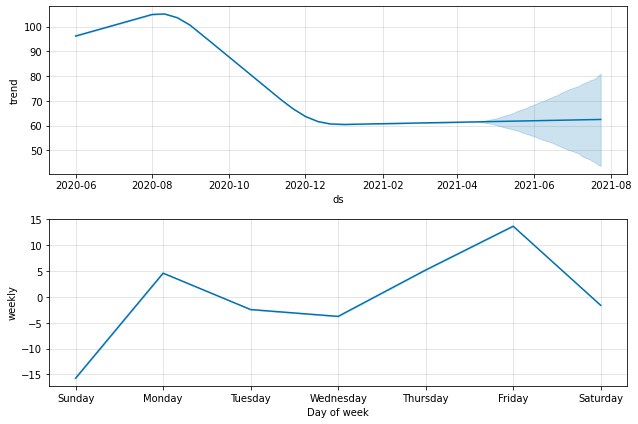

In [ ]:
data_forecast_plot=model.plot_components(pred)


In [ ]:
pred.to_csv('Prophet_Jun_Apr.csv')

In [ ]:
pred[['ds','yhat']].tail(60)


,ds,yhat
359,2021-05-26,58.152863
360,2021-05-27,67.143931
361,2021-05-28,75.633779
362,2021-05-29,60.328642
363,2021-05-30,46.225018
364,2021-05-31,66.577158
365,2021-06-01,59.539017
366,2021-06-02,58.222016
367,2021-06-03,67.213084
368,2021-06-04,75.702932
